# Minst CNN

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
print(tf.config.experimental.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Take a look into the DATA

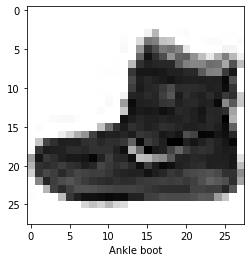

In [18]:
plt.imshow(train_images[0],cmap='binary')
# print(train_images[0]) # 0-255 binary image
plt.xlabel(class_names[train_labels[0]])
plt.show()

### Normalize the Data
$x=\frac{x-\min(x)}{\max(x)-\min(x)}$

In [16]:
train_images = train_images /255.0
test_images = test_images / 255.0

## Build the Model

### Flatten Inute Model

In [39]:
IMAGE_SIZE  = [train_images.shape[1],train_images.shape[2]]
IMAGE_PIXEL = IMAGE_SIZE[0]*IMAGE_SIZE[1]

train_images_flatted = train_images.reshape(-1,IMAGE_PIXEL)
test_images_flatted  = test_images.reshape( -1,IMAGE_PIXEL)

N_CLASS  = len(class_names)

train_labels_vec = tf.keras.utils.to_categorical(train_labels,N_CLASS)
test_labels_vec  = tf.keras.utils.to_categorical(test_labels,N_CLASS)

In [40]:
model = tf.keras.models.Sequential(
    tf.keras.layers.Dense(10, input_shape =(IMAGE_PIXEL,),activation = "softmax")    
)

In [41]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(lr = 0.01),
    loss      = 'categorical_crossentropy',
    metrics   = ['accuracy']
)

In [45]:
model.fit(train_images_flatted,train_labels_vec,
          batch_size=10, epochs=3,
         verbose=2)

Epoch 1/3
6000/6000 - 5s - loss: 0.4558 - accuracy: 0.8450
Epoch 2/3
6000/6000 - 5s - loss: 0.4454 - accuracy: 0.8480
Epoch 3/3
6000/6000 - 5s - loss: 0.4374 - accuracy: 0.8501


In [46]:
model.evaluate(test_images_flatted,test_labels_vec,
              batch_size=10,verbose=2)

1000/1000 - 1s - loss: 0.4952 - accuracy: 0.8167


[0.49517762660980225, 0.8166999816894531]